<a href="https://colab.research.google.com/github/SharanyaVermaRaj/test/blob/master/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install numpy opencv-python tensorflow


In [ ]:
from google.colab import files
import numpy as np

# Upload the Bayer RAW image
uploaded = files.upload()

# Read the uploaded file name (assuming you upload a file named 'raw_image.bayer')
file_name = list(uploaded.keys())[0]

# Load the Bayer RAW image (assuming GRBG format, 12-bit, 1920x1280)
bayer_image = np.fromfile(file_name, dtype=np.uint16).reshape((1280, 1920))

# Convert the image to 8-bit for processing (scale down from 12-bit to 8-bit)
bayer_image_8bit = (bayer_image / 16).astype(np.uint8)  # Convert to 8-bit


Saving eSFR_1920x1280_12b_GRGB_6500K_60Lux.raw to eSFR_1920x1280_12b_GRGB_6500K_60Lux (1).raw


In [ ]:
import cv2

def apply_median_filter(image):
    return cv2.medianBlur(image, 5)  # 5x5 kernel

median_denoised = apply_median_filter(bayer_image_8bit)


In [ ]:
def apply_bilateral_filter(image):
    return cv2.bilateralFilter(image, d=5, sigmaColor=75, sigmaSpace=75)

bilateral_denoised = apply_bilateral_filter(bayer_image_8bit)



In [ ]:
def apply_gaussian_filter(image):
    return cv2.GaussianBlur(image, (5, 5), sigmaX=0)

gaussian_denoised = apply_gaussian_filter(bayer_image_8bit)


In [ ]:
def apply_laplacian_filter(image):
    return cv2.Laplacian(image, cv2.CV_64F)

laplacian_enhanced = apply_laplacian_filter(bayer_image_8bit)


In [ ]:
def calculate_snr(original, denoised):
    noise = original.astype(np.float32) - denoised.astype(np.float32)
    snr = 10 * np.log10(np.mean(original.astype(np.float32)**2) / np.mean(noise**2))
    return snr

# Calculate SNR for different methods
snr_median = calculate_snr(bayer_image_8bit, median_denoised)
snr_bilateral = calculate_snr(bayer_image_8bit, bilateral_denoised)
snr_gaussian = calculate_snr(bayer_image_8bit, gaussian_denoised)

# Print SNR results
print(f"SNR Median Filter: {snr_median:.2f} dB")
print(f"SNR Bilateral Filter: {snr_bilateral:.2f} dB")
print(f"SNR Gaussian Filter: {snr_gaussian:.2f} dB")


SNR Median Filter: 24.99 dB
SNR Bilateral Filter: 25.49 dB
SNR Gaussian Filter: 25.54 dB


In [ ]:
import pandas as pd

# Compile results into a DataFrame
results = {
    "Method": ["Median Filter", "Bilateral Filter", "Gaussian Filter"],
    "SNR (dB)": [snr_median, snr_bilateral, snr_gaussian],
}

report_df = pd.DataFrame(results)
print(report_df)

# Optionally save the report
report_df.to_csv('denoising_report.csv', index=False)


             Method   SNR (dB)
0     Median Filter  24.987848
1  Bilateral Filter  25.492625
2   Gaussian Filter  25.540648


In [ ]:
display(report_df)  # This shows the DataFrame nicely in Colab


,Method,SNR (dB)
0,Median Filter,24.987848
1,Bilateral Filter,25.492625
2,Gaussian Filter,25.540648


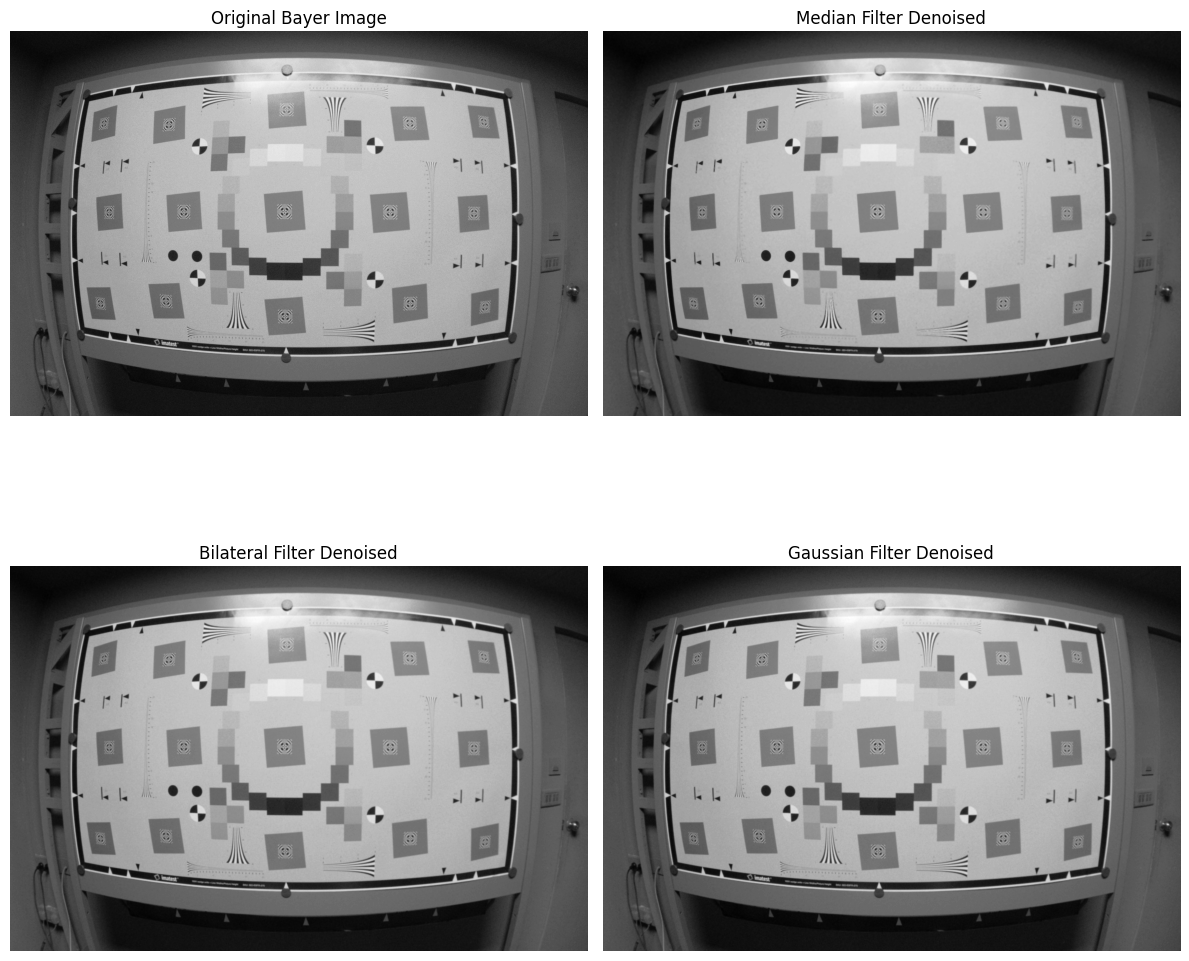

In [ ]:
import matplotlib.pyplot as plt

# Set up the subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Original Image
axs[0, 0].imshow(bayer_image_8bit, cmap='gray')
axs[0, 0].set_title('Original Bayer Image')
axs[0, 0].axis('off')

# Denoised Images
axs[0, 1].imshow(median_denoised, cmap='gray')
axs[0, 1].set_title('Median Filter Denoised')
axs[0, 1].axis('off')

axs[1, 0].imshow(bilateral_denoised, cmap='gray')
axs[1, 0].set_title('Bilateral Filter Denoised')
axs[1, 0].axis('off')

axs[1, 1].imshow(gaussian_denoised, cmap='gray')
axs[1, 1].set_title('Gaussian Filter Denoised')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
files.download('denoising_report.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>